## Relax Data Science Challenge

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven day  period ,  identify  which  factors  predict  future  user
adoption. 

Summary:
* name:  the  user's  name
* object_id:   the  user's  id
* email:  email  address
* creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:
- PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace
- GUEST_INVITE:  invited  to  an  organization  as  a  guest (limited  permissions)
- ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
- SIGNUP:  signed  up  via  the  website
- SIGNUP_GOOGLE_AUTH:  signed  up  using  Google
- Authentication  (using  a  Google  email  account  for  their  login
id)
* creation_time:  when  they  created  their  account
* last_session_creation_time:   unix  timestamp  of  last  login
* opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails
* enabled_for_marketing_drip:  whether  they  are  on  the  regular
marketing  email  drip
* org_id:   the  organization  (group  of  users)  they  belong  to
* invited_by_user_id:   which  user  invited  them  to  join  (if  applicable)

In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# import dataframes 
users = pd.read_csv('takehome_users.csv', encoding='latin1')
engagement = pd.read_csv('takehome_user_engagement.csv')


In [4]:
# examine users 
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
# need to convert last_session_creation_time to datetime
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [7]:
# examine engagement 
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
# convert time_stamp to datetime 
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp']) - pd.to_timedelta(7, unit='d')
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [10]:
# now we need to define active users
# someone who has logged in at least 3 times in a seven day period

engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [11]:
# minimum user ID is 1, max is 12000
adopted = []
for i in range(1,12001):
    times = []
    # only look at instances where someone has logged in over three times 
    if len(engagement[engagement['user_id']==i])>=3:
        # iterate through each of that user's logins
        for time in engagement[engagement['user_id']==i]['time_stamp']:
            # add times until a has three times in it 
            if len(times)<3:
                times.append(time)
            else:
                # add the user to our adopted users list if the time between the three logins in our list is less than 7 days
                if pd.Timestamp(times[2])-pd.Timestamp(times[0])<=pd.Timedelta('7 days'):
                    adopted.append(i)
                    break
                # if they're not 7 days apart, delete the first entry of our times list 
                else:
                    del times[0]
                times.append(time)
            

    

In [12]:
print('Active Users:', len(adopted))


Active Users: 1606


In [13]:
# add a column

classify = []
for i in range (1, 12001):
    if i in adopted:
        classify.append(1)
    else:
        classify.append(0)
        
users['adopted'] = classify

In [14]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


      creation_source  adopted
0        GUEST_INVITE      357
1          ORG_INVITE      560
2   PERSONAL_PROJECTS      163
3              SIGNUP      295
4  SIGNUP_GOOGLE_AUTH      231
      creation_source  adopted
0        GUEST_INVITE     2163
1          ORG_INVITE     4254
2   PERSONAL_PROJECTS     2111
3              SIGNUP     2087
4  SIGNUP_GOOGLE_AUTH     1385


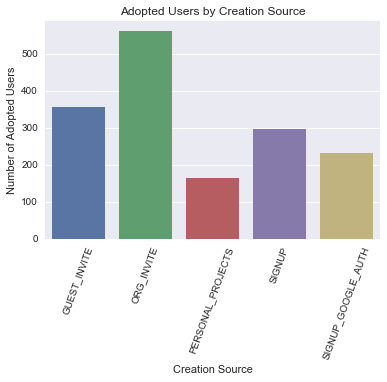

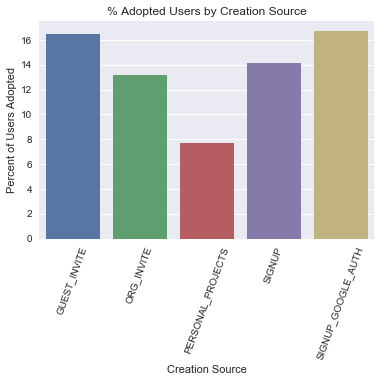

In [15]:
creation_source = (users[['adopted', 'creation_source']].groupby('creation_source').sum().reset_index())
print(creation_source)

creation_source2 = (users[['adopted', 'creation_source']].groupby('creation_source').count().reset_index())
print(creation_source2)

creation_source['pct_adopted'] = creation_source['adopted'] / creation_source2['adopted'] * 100

sns.barplot(x = 'creation_source', y = 'adopted', data=creation_source)
plt.xlabel('Creation Source')
plt.ylabel('Number of Adopted Users')
plt.title('Adopted Users by Creation Source')
plt.xticks(rotation=70)
plt.show()

sns.barplot(x = 'creation_source', y = 'pct_adopted', data=creation_source)
plt.xlabel('Creation Source')
plt.ylabel('Percent of Users Adopted')
plt.title('% Adopted Users by Creation Source')
plt.xticks(rotation=70)
plt.show()

   opted_in_to_mailing_list  adopted
0                         0     1189
1                         1      417
   opted_in_to_mailing_list  adopted
0                         0     9006
1                         1     2994


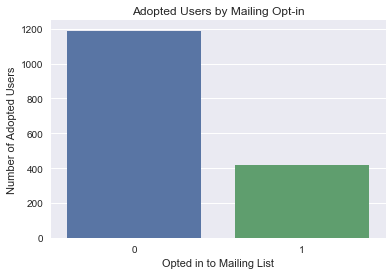

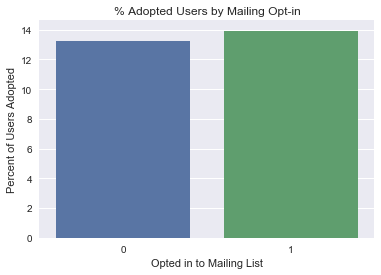

In [16]:
email = (users[['adopted', 'opted_in_to_mailing_list']].groupby('opted_in_to_mailing_list').sum().reset_index())
print(email)

email2 = (users[['adopted', 'opted_in_to_mailing_list']].groupby('opted_in_to_mailing_list').count().reset_index())
print(email2)

email['pct_adopted'] = email['adopted'] / email2['adopted'] * 100

sns.barplot(x = 'opted_in_to_mailing_list', y = 'adopted', data=email)
plt.xlabel('Opted in to Mailing List')
plt.ylabel('Number of Adopted Users')
plt.title('Adopted Users by Mailing Opt-in')
plt.show()

sns.barplot(x = 'opted_in_to_mailing_list', y = 'pct_adopted', data=email)
plt.xlabel('Opted in to Mailing List')
plt.ylabel('Percent of Users Adopted')
plt.title('% Adopted Users by Mailing Opt-in')
plt.show()

   enabled_for_marketing_drip  adopted
0                           0     1356
1                           1      250
   enabled_for_marketing_drip  adopted
0                           0    10208
1                           1     1792


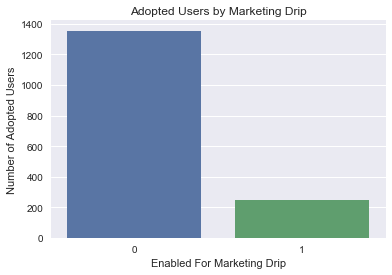

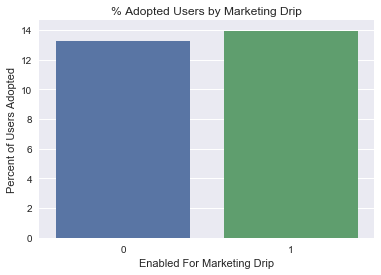

In [17]:
# marketing drip 

drip = (users[['adopted', 'enabled_for_marketing_drip']].groupby('enabled_for_marketing_drip').sum().reset_index())
print(drip)

drip2 = (users[['adopted', 'enabled_for_marketing_drip']].groupby('enabled_for_marketing_drip').count().reset_index())
print(drip2)

drip['pct_adopted'] = drip['adopted'] / drip2['adopted'] * 100

sns.barplot(x = 'enabled_for_marketing_drip', y = 'adopted', data=drip)
plt.xlabel('Enabled For Marketing Drip')
plt.ylabel('Number of Adopted Users')
plt.title('Adopted Users by Marketing Drip')
plt.show()

sns.barplot(x = 'enabled_for_marketing_drip', y = 'pct_adopted', data=drip)
plt.xlabel('Enabled For Marketing Drip')
plt.ylabel('Percent of Users Adopted')
plt.title('% Adopted Users by Marketing Drip')
plt.show()

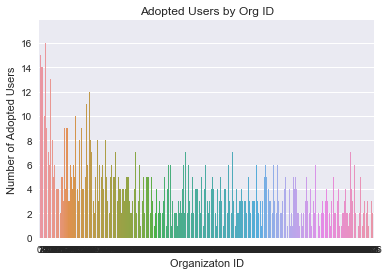

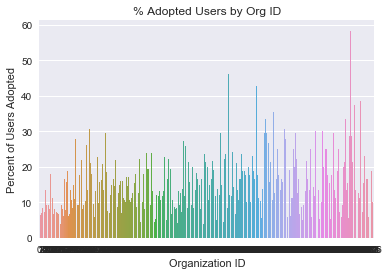

In [18]:
# org id

orgid = (users[['adopted', 'org_id']].groupby('org_id').sum().reset_index())
orgid2 = (users[['adopted', 'org_id']].groupby('org_id').count().reset_index())

orgid['pct_adopted'] = orgid['adopted'] / orgid2['adopted'] * 100

sns.barplot(x = 'org_id', y = 'adopted', data=orgid)
plt.xlabel('Organizaton ID')
plt.ylabel('Number of Adopted Users')
plt.title('Adopted Users by Org ID')
plt.show()

sns.barplot(x = 'org_id', y = 'pct_adopted', data=orgid)
plt.xlabel('Organization ID')
plt.ylabel('Percent of Users Adopted')
plt.title('% Adopted Users by Org ID')
plt.show()


In [19]:
orgid[orgid['pct_adopted'] > 40]

,org_id,adopted,pct_adopted
235,235,6,46.153846
270,270,6,42.857143
387,387,7,58.333333


Users with Org IDs of 235, 270, and 387 have very high conversion rates to adopted users. 

In [42]:
# make a column that describes if the person who referred the user is active or not 

users['invited_by_user_id'].fillna(-1, inplace=True)


vals = []
for index, row in users.iterrows():
    if users['invited_by_user_id'][index] == -1:
        vals.append(0)
    else:
        value = users['invited_by_user_id'][index]
        ix = value - 1
        if users['adopted'][ix] == 1:
            vals.append(1)
        else:
            vals.append(0)



In [44]:
# add column to dataframe
users['referral_adopted_status'] = vals

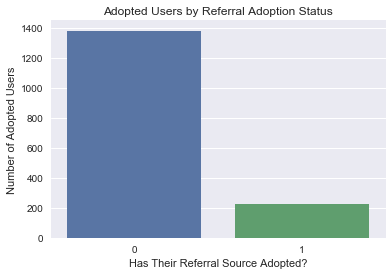

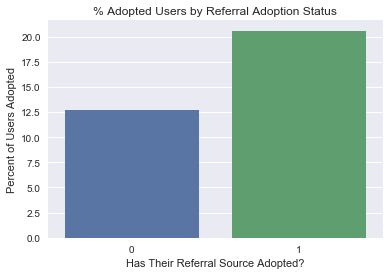

In [50]:
# status of referral

refer = (users[['adopted', 'referral_adopted_status']].groupby('referral_adopted_status').sum().reset_index())
refer2 = (users[['adopted', 'referral_adopted_status']].groupby('referral_adopted_status').count().reset_index())

refer['pct_adopted'] = refer['adopted'] / refer2['adopted'] * 100

sns.barplot(x = 'referral_adopted_status', y = 'adopted', data=refer)
plt.xlabel('Has Their Referral Source Adopted?')
plt.ylabel('Number of Adopted Users')
plt.title('Adopted Users by Referral Adoption Status')
plt.show()

sns.barplot(x = 'referral_adopted_status', y = 'pct_adopted', data=refer)
plt.xlabel('Has Their Referral Source Adopted?')
plt.ylabel('Percent of Users Adopted')
plt.title('% Adopted Users by Referral Adoption Status')
plt.show()

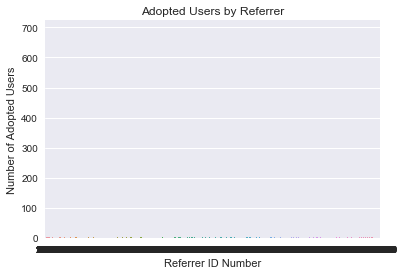

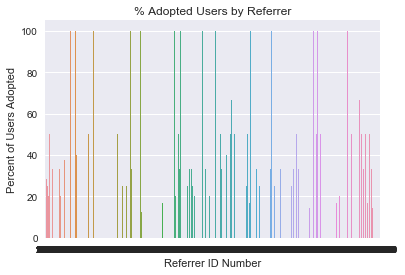

In [96]:
referrer = (users[['adopted', 'invited_by_user_id']].groupby('invited_by_user_id').sum().reset_index())
referrer2 = (users[['adopted', 'invited_by_user_id']].groupby('invited_by_user_id').count().reset_index())

referrer['pct_adopted'] = referrer['adopted'] / referrer2['adopted'] * 100

sns.barplot(x = 'invited_by_user_id', y = 'adopted', data=referrer)
plt.xlabel('Referrer ID Number')
plt.ylabel('Number of Adopted Users')
plt.title('Adopted Users by Referrer')
plt.show()

sns.barplot(x = 'invited_by_user_id', y = 'pct_adopted', data=referrer)
plt.xlabel('Referrer ID Number')
plt.ylabel('Percent of Users Adopted')
plt.title('% Adopted Users by Referrer')
plt.show()

In [98]:
referrer[referrer['pct_adopted'] > 60]

,invited_by_user_id,adopted,pct_adopted
6,29.0,1,100.000000
9,49.0,1,100.000000
14,79.0,1,100.000000
43,238.0,2,66.666667
52,294.0,1,100.000000
54,302.0,1,100.000000
63,350.0,1,100.000000
105,540.0,1,100.000000
107,545.0,2,100.000000
120,600.0,2,100.000000


In [73]:
# machine learning time!
from sklearn.model_selection import train_test_split

users_ml = users[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
                 'org_id', 'invited_by_user_id','adopted', 'referral_adopted_status']]

users_ml = pd.get_dummies(users_ml, columns = ['creation_source'])


In [74]:
# define X, y

X = users_ml.drop(['adopted'], axis=1)
y = users_ml['adopted']

In [75]:
# train, test, split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

0.82625
[[1953  127]
 [ 290   30]]


In [78]:
# try gradient boosting classifier

from sklearn.ensemble import GradientBoostingClassifier
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = GradientBoostingClassifier(n_estimators=500)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

0.8575
[[2054   16]
 [ 326    4]]


This has a higher accuracy, but only got 4 true positives. I do not like that. I'm happy with the 82.6% accuracy from the Random Forest Classifier. 

/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


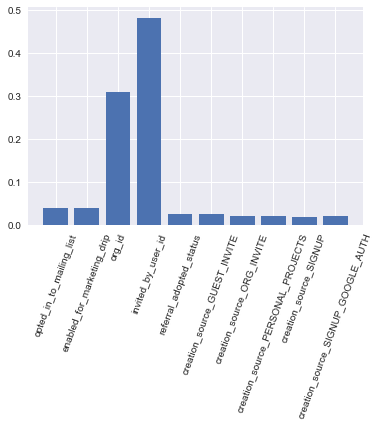

In [93]:
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=X.columns, 
                          columns=["Importance"])

x = range(importance.shape[0])
y = importance.ix[:, 0]

plt.bar(x, y)
plt.xticks(np.arange(10), X.columns, rotation=70)

plt.show()

org_id and invited_by_user_id are the most important features in the Random Forest Classifier. 